Imports and data filtering:

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Slider
#-------------------------------------------------------------------------------------
filename = '/home/jcode/Downloads/sw01088940000bevshsp_uf.evt.gz'
eventfile=fits.open(filename)
events=eventfile[1].data
shortdat=events[(events['TIME']>660920900) & (events['TIME']<660921200)]
filterdat = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>0)]

#-------------------------------------------------------------------------------------
array = np.empty((0,3), int)
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

If df2 (starting time) is necessary:

In [ ]:
for i in range(len(time)):
    if int(time[i]) == time[0]:
        array = np.append(array, np.array([[int(df.iloc[i][5]), int(df.iloc[i][6]), int(df.iloc[i][8])]]), axis=0)

df2 = pd.DataFrame(array, columns=['DETX', 'DETY', 'ENERGY'])

#-------------------------------------------------------------------------------------
Xmax = 0
Ymax = 0

for i in df2['DETX']:
    if i > Xmax:
        Xmax = i

for i in df2['DETY']:
    if i > Ymax:
        Ymax = i
        
def round50(x, base=50):
    return base * round(x/base)
    
Xmax = round50(Xmax, base=25) + 25
Ymax = round50(Ymax, base=25) + 25
        
#-------------------------------------------------------------------------------------
init_x=df2['DETX']
init_y=df2['DETY']
init_energy=df2['ENERGY']

fig, ax = plt.subplots()
scat = ax.scatter(x=init_x, y=init_y, s=init_energy, alpha=0.5)
plt.xlim([-10, Xmax])
plt.ylim([-10, Ymax])

fig.subplots_adjust(bottom=0.25)

#The horizontal slider for time
axtime = fig.add_axes([0.15, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Time [s]',
    valmin=int(time[0]),
    valmax=int(time[-1]),
    valinit=660920900, valstep=1,
)
    
# The function to be called anytime a slider's value changes
def update(val):
    newx = np.empty((0,1), int)
    newy = np.empty((0,1), int)
    newsize = np.empty((0,1), int)
    for i in range(len(time)):
        if int(time[i]) == time_slider.val:
            newx = np.append(newx, np.array([[int(df.iloc[i][5])]]), axis=0)
            newy = np.append(newy, np.array([[int(df.iloc[i][6])]]), axis=0)
            newsize = np.append(newsize, np.array([[int(df.iloc[i][8])]]), axis=0)
    ax.clear()
    scat = ax.scatter(x=newx, y=newy, s=newsize, alpha=0.5)
    fig.canvas.draw_idle()


# register the update function with each slider
time_slider.on_changed(update)


plt.show()

Text(0.5, 1.0, '0.08 s x 1 keV pixels')

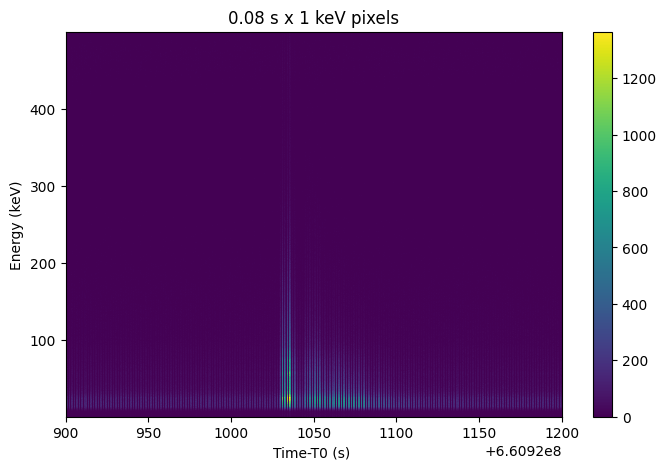

In [2]:
dur=40
bins=500
fig=plt.figure(figsize=(8,5))
etpix=plt.hist2d(df['TIME'], df['ENERGY'],bins=bins)
plt.xlabel('Time-T0 (s) ')
plt.ylabel('Energy (keV)')
plt.yscale('linear')
plt.colorbar()
plt.title(f'{round(dur/bins,2)} s x {round(475/bins)} keV pixels')

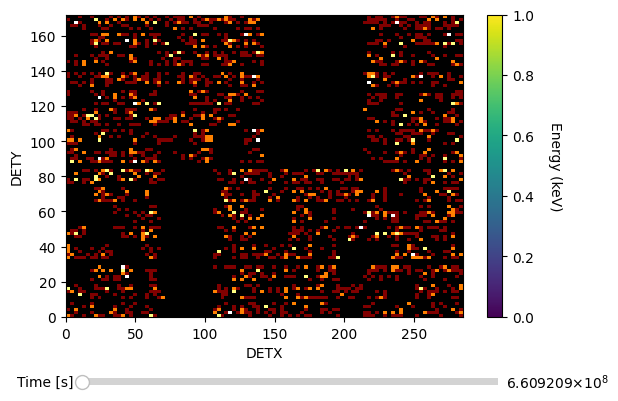

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Slider
#-------------------------------------------------------------------------------------
filename = '/home/jcode/Downloads/sw01088940000bevshsp_uf.evt.gz'
eventfile=fits.open(filename)
events=eventfile[1].data
shortdat=events[(events['TIME']>660920900) & (events['TIME']<660921200)]
filterdat = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>0)]

#-------------------------------------------------------------------------------------
array = np.empty((0,3), int)
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

for i in range(len(time)):
    if int(time[i]) == time[0]:
        array = np.append(array, np.array([[int(df.iloc[i][5]), int(df.iloc[i][6]), int(df.iloc[i][8])]]), axis=0)

df2 = pd.DataFrame(array, columns=['DETX', 'DETY', 'ENERGY'])
#-------------------------------------------------------------------------------------
init_x=df2['DETX']
init_y=df2['DETY']

fig, ax = plt.subplots()
hist = ax.hist2d(x=init_x, y=init_y, bins=100, cmap='afmhot')
plt.xlabel('DETX')
plt.ylabel('DETY')
plt.yscale('linear')
cbar = fig.colorbar(mappable=None, ax=ax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('Energy (keV)', rotation=270)
fig.subplots_adjust(bottom=0.25)

axtime = fig.add_axes([0.15, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Time [s]',
    valmin=int(time[0]),
    valmax=int(time[-1]),
    valinit=time[0, valstep=1,
)

def update(val):
    newx = np.empty((0,1), int)
    newy = np.empty((0,1), int)
    for i in range(len(time)):
        if int(time[i]) == time_slider.val:
            newx = np.append(newx, np.array([[int(df.iloc[i][5])]]), axis=0)
            newy = np.append(newy, np.array([[int(df.iloc[i][6])]]), axis=0)
    ax.clear()
    hist = ax.hist2d(x=init_x, y=init_y, bins=100)
    fig.canvas.draw_idle()

time_slider.on_changed(update)

plt.show()

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Slider
#-------------------------------------------------------------------------------------
filename = '/home/jcode/Downloads/sw01088940000bevshsp_uf.evt.gz'
eventfile=fits.open(filename)
events=eventfile[1].data
shortdat=events[(events['TIME']>660920900) & (events['TIME']<660921200)]
filterdat = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>0)]
#-------------------------------------------------------------------------------------
array = np.empty((0,3), int)
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

for i in range(len(time)):
    if int(time[i]) == 660920900:
        array = np.append(array, np.array([[int(df.iloc[i][5]), int(df.iloc[i][6]), int(df.iloc[i][8])]]), axis=0)

df2 = pd.DataFrame(array, columns=['DETX', 'DETY', 'ENERGY'])
#-------------------------------------------------------------------------------------
init_x=df2['DETX']
init_y=df2['DETY']

fig, ax = plt.subplots()
hist = ax.hist2d(x=init_x, y=init_y, bins=500)
plt.xlabel('DETX')
plt.ylabel('DETY')
plt.yscale('linear')
fig.colorbar(mappable=None, ax=ax)
fig.subplots_adjust(bottom=0.25)

axtime = fig.add_axes([0.15, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Time [s]',
    valmin=int(time[0]),
    valmax=int(time[-1]),
    valinit=660920900, valstep=1,
)

def update(val):
    newx = np.empty((0,1), int)
    newy = np.empty((0,1), int)
    for i in range(len(time)):
        if int(time[i]) == time_slider.val:
            newx = np.append(newx, np.array([[int(df.iloc[i][5])]]), axis=0)
            newy = np.append(newy, np.array([[int(df.iloc[i][6])]]), axis=0)
    ax.clear()
    hist = ax.hist2d(x=init_x, y=init_y, bins=500)
    fig.canvas.draw_idle()

time_slider.on_changed(update)

plt.show()

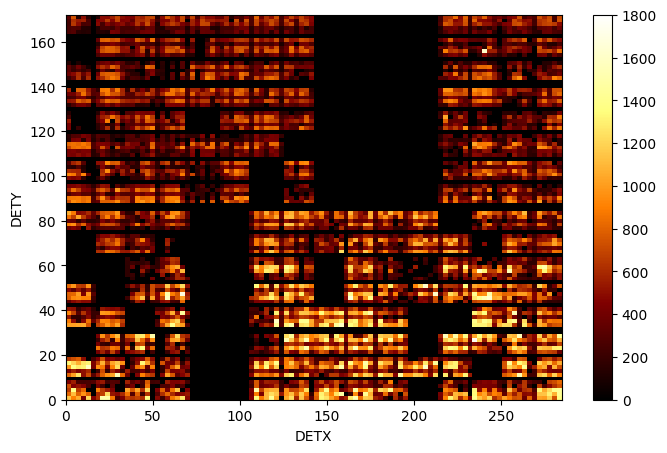

In [48]:
fig=plt.figure(figsize=(8,5))
etpix=plt.hist2d(df['DETX'], df['DETY'], bins=100, cmap='afmhot')
plt.xlabel('DETX')
plt.ylabel('DETY')
plt.yscale('linear')
plt.colorbar()
plt.clim(0,1800)

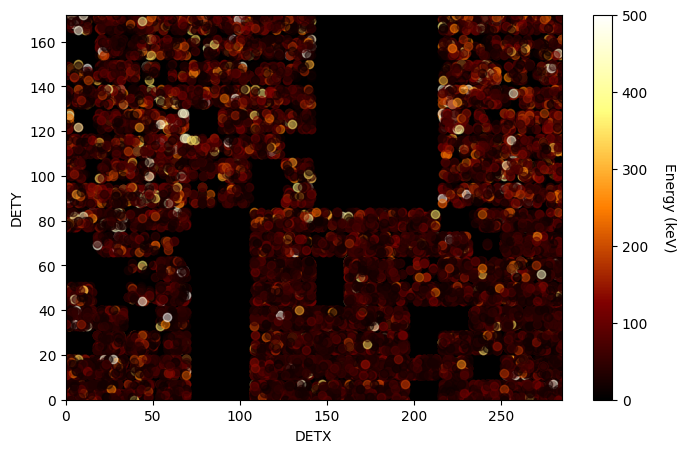

In [3]:
array = np.empty((0,3), int)
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

for i in range(len(time)):
    if int(time[i]) == 660921050:
        array = np.append(array, np.array([[int(df.iloc[i][5]), int(df.iloc[i][6]), int(df.iloc[i][8])]]), axis=0)

df2 = pd.DataFrame(array, columns=['DETX', 'DETY', 'ENERGY'])

#-------------------------------------------------------------------------------------
x = df2['DETX']
y = df2['DETY']
maxE = int(round(max(df['ENERGY'])))
minE = int(round(min(df['ENERGY'])))

fig=plt.figure(figsize=(8,5))
etpix=plt.hist2d(x, y, bins=100, cmap='afmhot')
plt.xlabel('DETX')
plt.ylabel('DETY')

cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('Energy (keV)', rotation=270)

for i in range(len(x)):
    color = plt.cm.afmhot((df2['ENERGY'][i] - minE) / (maxE - minE))
    plt.plot([x[i]], [y[i]], 'o', color=color, alpha=0.5)
    plt.clim(minE, maxE)

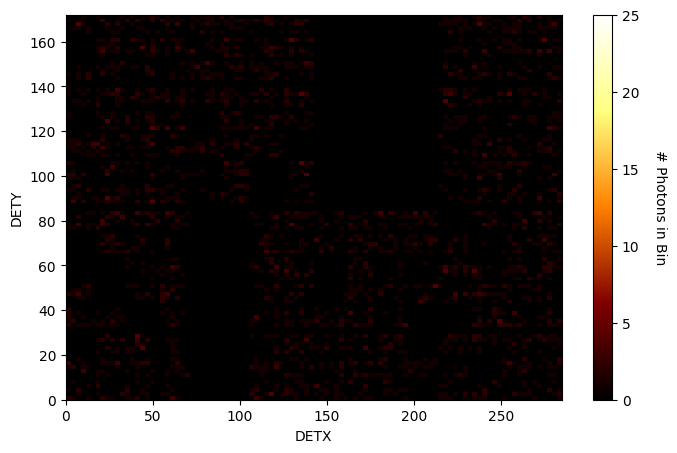

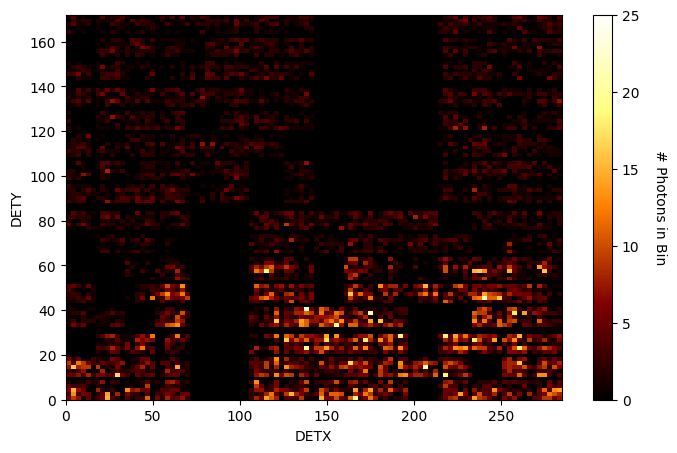

In [16]:
array = np.empty((0,3), int)
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

for i in range(len(time)):
    if int(time[i]) == time[0]:
        array = np.append(array, np.array([[int(df.iloc[i][5]), int(df.iloc[i][6]), int(df.iloc[i][8])]]), axis=0)

df2 = pd.DataFrame(array, columns=['DETX', 'DETY', 'ENERGY'])
#-------------------------------------------------------------------------------------
fig=plt.figure(figsize=(8,5))
etpix=plt.hist2d(df2['DETX'], df2['DETY'], bins=100, cmap="afmhot")
plt.xlabel('DETX')
plt.ylabel('DETY')
plt.yscale('linear')

cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('# Photons in Bin', rotation=270)
plt.clim(0, 25)

array2 = np.empty((0,3), int)

for i in range(len(time)):
    if int(time[i]) == 660921040:
        array2 = np.append(array2, np.array([[int(df.iloc[i][5]), int(df.iloc[i][6]), int(df.iloc[i][8])]]), axis=0)

df3 = pd.DataFrame(array2, columns=['DETX', 'DETY', 'ENERGY'])
#-------------------------------------------------------------------------------------
fig=plt.figure(figsize=(8,5))
etpix=plt.hist2d(df3['DETX'], df3['DETY'], bins=100, cmap="afmhot")
plt.xlabel('DETX')
plt.ylabel('DETY')
plt.yscale('linear')

cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('# Photons in Bin', rotation=270)
plt.clim(0, 25)

2D histogram wtih a singular slider for the timeframe

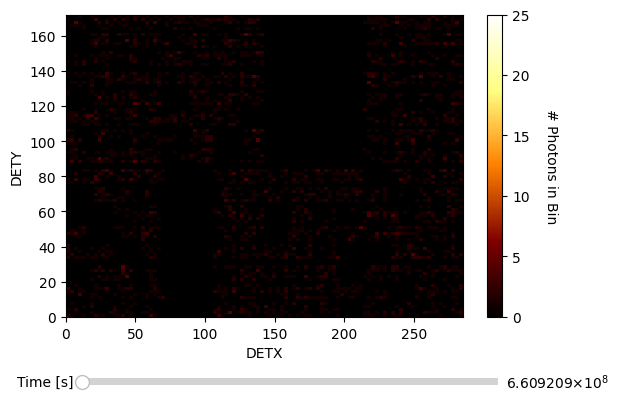

In [36]:
array = np.empty((0,2), int)
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

for i in range(len(time)):
    if int(time[i]) == time[0]:
        array = np.append(array, np.array([[int(df.iloc[i][5]), int(df.iloc[i][6])]]), axis=0)

df2 = pd.DataFrame(array, columns=['DETX', 'DETY'])
#-------------------------------------------------------------------------------------
init_x=df2['DETX']
init_y=df2['DETY']

fig, ax = plt.subplots()
hist = ax.hist2d(x=init_x, y=init_y, bins=100, cmap='afmhot')
plt.xlabel('DETX')
plt.ylabel('DETY')
fig.subplots_adjust(bottom=0.25)

cbar = fig.colorbar(hist[3], ax=ax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('# Photons in Bin', rotation=270)
cbar.mappable.set_clim(vmin=0, vmax=25)

axtime = fig.add_axes([0.15, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Time [s]',
    valmin=time[0],
    valmax=time[-1],
    valinit=time[0], valstep=1,
)

def update(val):
    newx = np.empty((0,1), int)
    newy = np.empty((0,1), int)
    for i in range(len(time)):
        if int(time[i]) == time_slider.val:
            newx = np.append(newx, np.array([[int(df.iloc[i][5])]]))
            newy = np.append(newy, np.array([[int(df.iloc[i][6])]]))
    ax.clear()
    hist = ax.hist2d(x=newx, y=newy, bins=100, cmap='afmhot')
    fig.canvas.draw_idle()


time_slider.on_changed(update)


plt.show()

Histogram of interval TEST:

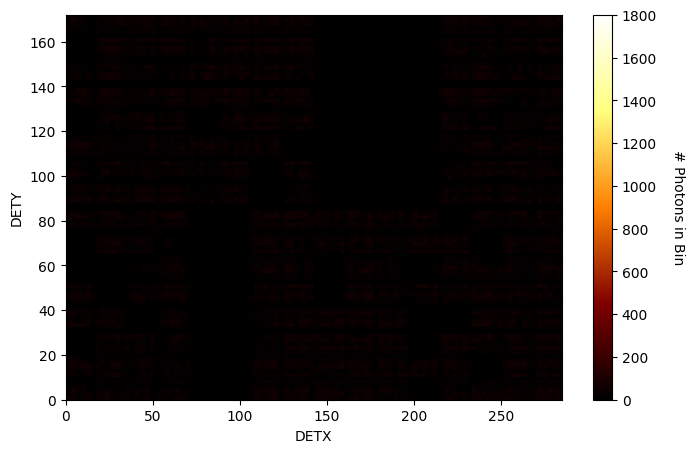

In [15]:
start = 660921172
end = 660921200
newx = np.empty((0,1), int)
newy = np.empty((0,1), int)
for i in range(len(time)):
    if time[i] in range(start, end + 1):
        newx = np.append(newx, np.array([[int(df.iloc[i][5])]]))
        newy = np.append(newy, np.array([[int(df.iloc[i][6])]]))

#-------------------------------------------------------------------------------------
fig=plt.figure(figsize=(8,5))
etpix=plt.hist2d(newx, newy, bins=100, cmap="afmhot")
plt.xlabel('DETX')
plt.ylabel('DETY')
plt.yscale('linear')

cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('# Photons in Bin', rotation=270)
plt.clim(0, 1800)

2D Histogram of photons between the interval of startTime to endTime

In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Slider
#-------------------------------------------------------------------------------------
filename = '/home/jcode/Downloads/sw01088940000bevshsp_uf.evt.gz'
eventfile=fits.open(filename)
events=eventfile[1].data
shortdat=events[(events['TIME']>660920900) & (events['TIME']<660921200)]
filterdat = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>0)]
#-------------------------------------------------------------------------------------
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

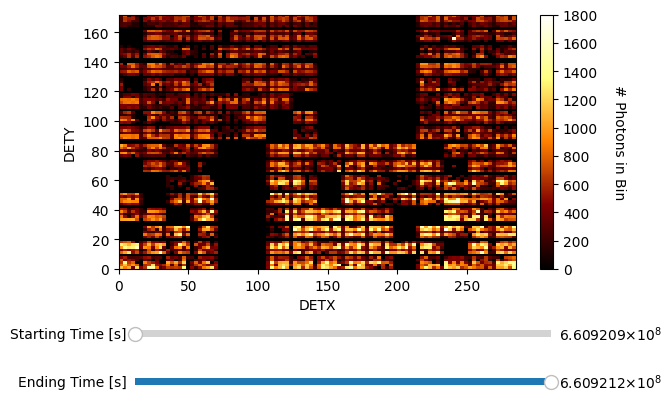

In [1]:
#-------------------------------------------------------------------------------------
init_x=df['DETX']
init_y=df['DETY']

fig, ax = plt.subplots()
hist = ax.hist2d(x=init_x, y=init_y, bins=100, cmap='afmhot')
plt.xlabel('DETX')
plt.ylabel('DETY')
fig.subplots_adjust(bottom=0.35)

cbar = fig.colorbar(hist[3], ax=ax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('# Photons in Bin', rotation=270)
cbar.mappable.set_clim(vmin=0, vmax=1800)

axstartTime = fig.add_axes([0.15, 0.2, 0.65, 0.03])
startTime_slider = Slider(
    ax=axstartTime,
    label='Starting Time [s]',
    valmin=time[0],
    valmax=time[-1],
    valinit=time[0], valstep=1,
)

axendTime = fig.add_axes([0.15, 0.1, 0.65, 0.03])
endTime_slider = Slider(
    ax=axendTime,
    label='Ending Time [s]',
    valmin=time[0],
    valmax=time[-1],
    valinit=time[-1], valstep=1,
)

def update(val):
    start = startTime_slider.val
    end = endTime_slider.val
    newx = np.empty((0,1), int)
    newy = np.empty((0,1), int)
    for i in range(len(time)):
        if time[i] in range(start, end + 1):
            newx = np.append(newx, np.array([[int(df.iloc[i][5])]]))
            newy = np.append(newy, np.array([[int(df.iloc[i][6])]]))
    ax.clear()
    if start < end:
        hist = ax.hist2d(x=newx, y=newy, bins=100, cmap='afmhot')
        #cbar = fig.colorbar(hist[3], ax=ax)
        #cbar.ax.get_yaxis().labelpad = 20
        #cbar.set_label('# Photons in Bin', rotation=270)
        #cbar.mappable.set_clim(vmin=0, vmax=1800)
    else:
        ax.text(0.5, 0.5, 'Starting Time must be less than Ending Time',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)
    fig.canvas.draw_idle()

startTime_slider.on_changed(update)
endTime_slider.on_changed(update)


plt.show()

Needs to be faster when updating

Not displaying correct histogram when run together

Only correct when adding another color bar but they stack

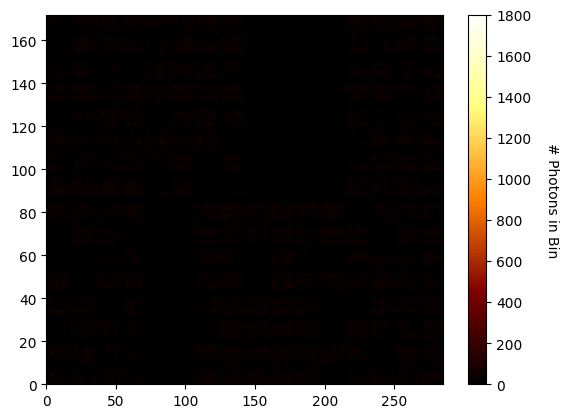

In [11]:
start = 660921177
end = 660921200
newx = np.empty((0,1), int)
newy = np.empty((0,1), int)
for i in range(len(time)):
    if time[i] in range(start, end + 1):
        newx = np.append(newx, np.array([[int(df.iloc[i][5])]]))
        newy = np.append(newy, np.array([[int(df.iloc[i][6])]]))
if start < end:
    fig, ax = plt.subplots()
    hist = ax.hist2d(x=newx, y=newy, bins=100, cmap='afmhot')
    cbar = fig.colorbar(hist[3], ax=ax)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.set_label('# Photons in Bin', rotation=270)
    cbar.mappable.set_clim(vmin=0, vmax=1800)
plt.show()